In [30]:
import numpy
import matplotlib
from scipy.signal import hilbert, chirp 
import scipy.signal as signal
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [31]:
def funEXP(x, A, c, d):
    return A*np.exp(c*x) + d

In [32]:
def enveloppe(s):
    u_x = array([1,2,1]) #ndarray(ix) # do not add 0
    u_y = array([1,2,1]) #ndarray(iy)  
    for k in range(1,len(s)-1):
        if (np.sign(s[k]-s[k-1])==1) and (np.sign(s[k]-s[k+1])==1):
            u_x=append(u_x,float(k))
            u_y=append(u_y,s[k])

    u_p = interp1d(u_x,u_y,fill_value="extrapolate") #,kind = 'cubic')#,fill_value="extrapolate")
#    u_p = interp1d(u_x,u_y, kind = 'linear',
#              bounds_error = False, 
#              fill_value="extrapolate") # use fill_value="extrapolate"
    for k in range(0,len(s)):
        q_u[k] = u_p(float(k+0.1))
    return q_u

In [33]:
data=loadtxt('CAPA_3.txt',skiprows=1)

In [34]:
data2=zeros(256)
data2=data.reshape(256)
print (min(data2),max(data2))

0.0 1460.0


In [35]:
data3=loadtxt('1605a.txt',skiprows=1)
print(min(data3[:,2]),max(data3[:,2]))

0.0 254.0


In [36]:
x=arange(0,200)
y=arange(0,256,0.5)
shape(y)

(512,)

In [37]:
ix=200 
iy=512

In [38]:
z=zeros(ix*iy).reshape(iy,ix)

In [39]:
k=0
for j in range(ix):
    for i in range(iy):
        z[i,j]=float(data3[k,2])
        k=k+1


In [40]:
G=zeros(ix*iy).reshape(iy,ix)
Gh=zeros(ix*iy).reshape(iy,ix)

In [41]:
# convert logarithm to signal 
k=0
for j in range(ix):
    for i in range(iy):
        #z[i,j]=float(data3[k,2])
        G[i,j]=data2[int(z[i,j])]#-max(data2)*.5
        k=k+1

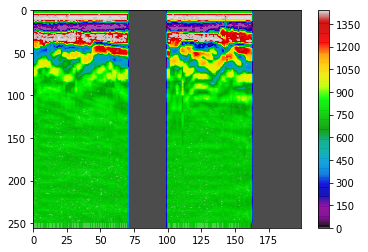

In [42]:
ylim(255.5,0)
contourf(x,y,G,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('z.png')

### Баттерворт фильтр

In [43]:
Gb=zeros(ix*iy).reshape(iy,ix)
N=len(Gb[:,0])
freq=1./float(N)
# First, design the Buterworth filter
N  = 3    # Filter order
#Wn = 0.01 # Cutoff frequency
Wn=50.*freq
for i in range(ix):
    B, A = signal.butter(N, Wn, output='ba')
    # Second, apply the filter
    Gb[:,i] = signal.filtfilt(B,A,G[:,i] )

### envelope signal

In [44]:

Gh=zeros(ix*iy).reshape(iy,ix)
q_u = np.zeros(iy)
s=zeros(iy)
se=zeros(iy)
for i in range(ix):
    
    #s[:]=Gb[:,i]+1.#Gb[:,i]
    #print(i)
    s[:]=abs(Gb[:,i])+1.
    se=enveloppe(s)
    Gh[:,i]=se[:]

C:\Users\user\Anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:571: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [45]:
for i in range(ix):
    for j in range(iy):
        if isnan(Gh[j,i]):
            Gh[j,i]=1.

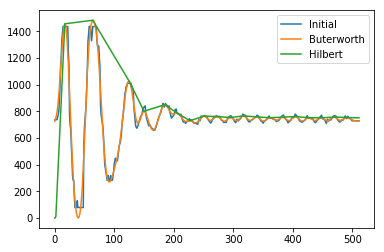

In [46]:
plot(G[:,10],label="Initial")
plot(Gb[:,10],label="Buterworth")

plot (Gh[:,10],label="Hilbert")
legend()


In [47]:
pos=zeros(iy)
neg=zeros(iy)
for i in range(iy):
    if G[i,10] >0.:
        pos[i]=G[i,10]
    else:
        neg[i]=G[i,10]

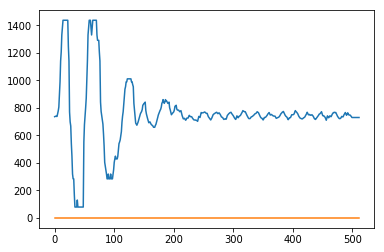

In [48]:
plot(pos)
plot(-neg)

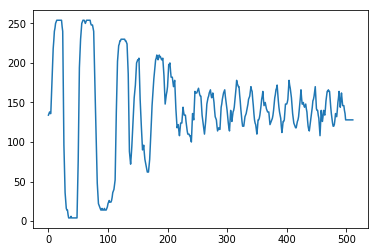

In [49]:
plot(z[:,10])

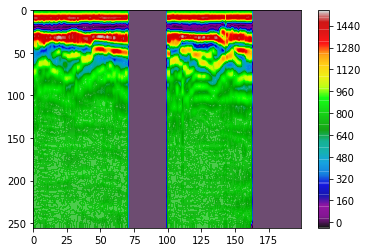

In [50]:
ylim(255.5,0)
contourf(x,y,Gb,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gb.png')

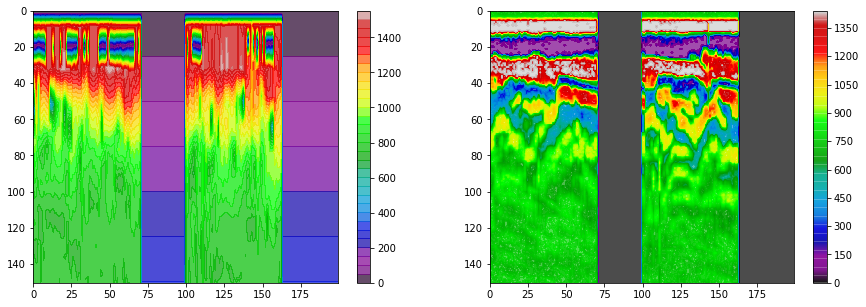

In [51]:
#преобразование Гильберта (для определения среды)
figsize(15,5)
subplot(1,2,1)
ylim(150.5,0)
lim=arange(700,1500,10)
contourf(x,y,Gh,32,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
subplot(1,2,2)
ylim(150.5,0)
contourf(x,y,G,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()

In [52]:
# Производная
Gp=zeros(ix*iy).reshape(iy,ix)
for j in range(iy-1):
    Gp[j,:]=Gh[j+1,:]-Gh[j,:]


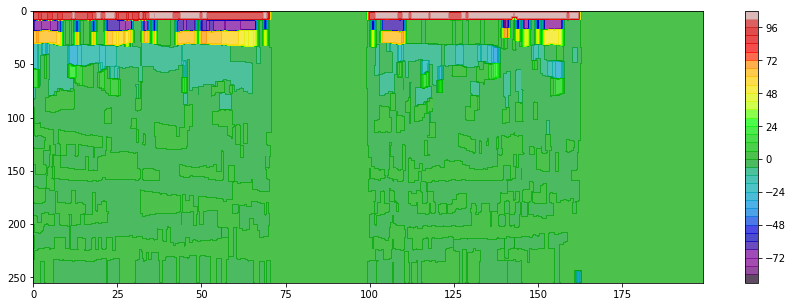

In [53]:
lim=arange(-30,50,1)
ylim(255.0,0)
contourf(x,y,Gp,32,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
savefig('Gp.png')

In [54]:
cmass=zeros(71*3).reshape(3,71)
#print(Gh[2,:])
for i in range(71):
    p0=[Gh[10,i],-0.5,100.]
    popt, pcov = curve_fit(funEXP, y, Gh[:,i],p0=p0)
    #print(i)
    cmass[0,i]=popt[0]
    cmass[1,i]=popt[1]
    cmass[2,i]=popt[2]

In [ ]:
plot(y,)

In [69]:
print(len(y))
Gp=zeros(71*iy).reshape(iy,71)
for i in range(71):
    A=cmass[0,i]
    c=cmass[1,i]
    d=cmass[2,i]
    for j in range(iy):
        Gp[j,i]=G[j,i]-funEXP(y[j],A,c,d)

512


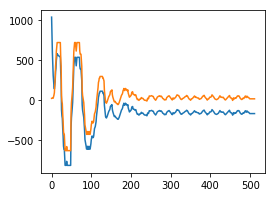

In [70]:
plot(Gp[:,10])
plot(G[:,10]-max(G[:,10])*.5)

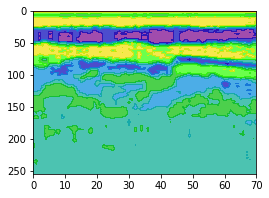

In [66]:
figsize(4,3)
ylim(255,0)
contourf(Gp,alpha=0.7,cmap=cm.nipy_spectral)

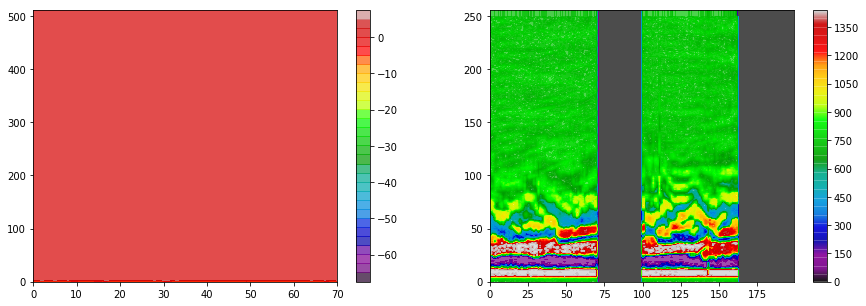

In [58]:
#преобразование Гильберта (для определения среды)
figsize(15,5)
subplot(1,2,1)
#ylim(150.5,0)
lim=arange(700,1500,10)
contourf(Gp,32,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
subplot(1,2,2)
#ylim(150.5,0)
contourf(x,y,G,256,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()